<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 6 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 10 October 2019, with material from Justin Silverman, Thomas Wiecki, and Ravin Kumar</div>

# Chief Bayesian Officer (CBO) at Amazon

<br />
<center>
<img src="images/amazon.jpg", width=400 />
</center>

One of you asked me the other day, ***professor, can you give me a practical application of Bayesian estimation***? Well, I thought, weather statistical modeling sounds pretty practical. But I know what he meant, something ***experiential*** that is more **tangible** than theory. 

So, have you ever wondered how Amazon decides to buy how mamy of those widgets you cannot live without so that you can then order them from their Web site? I did, for my [DevOps CSYE 7220](http://catalog.northeastern.edu/course-descriptions/csye/) class, where we use DevOps tools and practices to build duck-chasing robots.

What if we build a model and actually incorporate the model estimate directly into a decision making process? Can we use an optimizer to find the best decision(s) not only under the most likely scenario, but under *all* possible scenarios? Is that how Amazon does it? I mean, I don't know, I don't work at Amazon. But this sounds like a good approach to the problem.

This moves Bayesian modeling from something that informs a decision to something that *makes* a decisio.

This problem is called [**supply chain optimization**](https://en.wikipedia.org/wiki/Supply-chain_optimization), and that is something you can definitely mention in any interview that asks you about something concrete you have learned from yor Data Science curriculum that can help the company.

But first, we need a quick introduction to **Bayesian Decision Theory**.

## Part 1: Bayesian Decision Theory

[Bayesian Decision Theory](https://wiki.lesswrong.com/wiki/Bayesian_decision_theory), a useful [tool](https://en.wikipedia.org/wiki/Bayes_estimator) that provides a **formalism** for **decision-making** under **uncertainty**.

It is a statistical system that tries to quantify the tradeoff between various decisions, making use of probabilities and costs. An agent operating under such a decision theory uses the concepts of Bayesian statistics to estimate the expected value of its actions, and update its expectations based on new information.

It is used in a diverse range of applications including but definitely not limited to finance for guiding [investment strategies](https://en.wikipedia.org/wiki/Investment_strategy), in engineering for designing [control systems](https://en.wikipedia.org/wiki/Control_system), or in [Sport analytics](https://en.wikipedia.org/wiki/Sports_analytics).

We first need to introduce some formal way in which we discuss **decisions**. For a given problem, imagine that there is a space in which all of my possible decisions live. This space can be *discrete*, *continuous*, *multivariate*, or any number of crazy things based on the problem at hand. In what follows we will denote our decision space (regardless of what exactly it is) by $A$ and a decision $a ∈ A$.

For example, all trade decisions in the NFL. $a$ might represent a trade of Tom Brady.

<br />
<center>
<img src="images/tombrady.png", width=200 />
</center>

Oh my god, what am I saying?! I'm going to get ***lynched***~ Scrap that! Let's say I am trying to decide a price at which to list my used iPhone I want to sell. In this case I may denote my decision space as the entire positive real line such that $a ∈ [0,+∞)$.

In Bayesian decision theory we are concerned with choosing between these different decision based on some **information**. Like our decision space, there is flexibility in what our information may be (univariate, multivariate, continuous, discrete, etc…). Whatever that information is, let's denote the space that our information lives in by $Θ$ and a piece of information (one element of this space) by $θ$ such that $θ ∈ Θ$.

For example, I may want to use a model fit to previous online listings to predict the probability that my phone will sell at a given listing price. In this case my information may be the probability that my phone will sell at the specified price such that $Θ ∈ [0,1]$.

So how do we determine the ***best*** decision? This requires that we first define some notion of what are we trying to do. The formal object that we use to do this goes by many names depending on the field: let's refer to it as a **Loss function** (L). The crucial idea is that this is a function that allows us to quantify how bad/good a given decision ($a$) is given some information ($θ$).

What does it mean to ***quantify***? By convention, it means a real number (between −∞ and +∞). This real value will reflect the ***loss we feel*** if we choose decision $a$ given our information $θ$. We may denote this loss function as

$$L:Θ × A → R$$

The crucial idea is that the loss function ties together our decision space (A) and our information space (Θ).

The hard part of decision theory is often the choice of the loss function.

For example, let's say I want to ***maximize the amount of money*** I expect to make (my expected return). In this case I may choose a simple loss function of the following form $L(θ,a) = −θ\;a$. Recall that in this example $θ$ is a probability that the phone will sell and $a$ is the price I list it at. The negative sign is there because in this case we want to maximize our return so I am denoting this as negative loss.

#### Connection to Bayes

Rather than just dealing with a single known value for $θ ∈ Θ$ we now work with a **probability distribution** representing our belief in the **true** value of $θ$ which we will denote by $p(θ)$. To connect this to Bayesian statistics, we may have a posterior distribution over $θ$ conditioned on some observed data $y$. It is because Bayesian statistics is often about calculating these posterior distributions that most Bayesian texts on decision theory discuss this uncertainty of information as $p(θ\;|\;y)$

So how do we figure out the loss associated with individual decisions when we don’t even know the information we want to use to make a decision? The answer is that we turn to probability theory and instead calculate the **Expected Loss** we would feel if we choose a given action given our beliefs (our probability distribution) about θ. We calculate this **Expected loss** just like we would calculate the *expectation* of any other function of a random variable:

$$\text{Expected Loss}(a) = \int_\Theta\mathcal{L}(\theta, a)p(\theta)d\theta$$

Essentially the expected loss sums up the loss we would feel for a given decision $a$ over all possible values of our information $θ$, but weighted by the probability of $θ$. 

In this form the Expected Loss does some pretty remarkable things in terms of decision making. In particular, the Expected Loss balances between how probable each value of $θ$ is and the loss associated with each value of $θ$ for a given $a$.
 
We can approximate this integral by using $N$ samples $(θ_1,…,θ_N)$ from the distribution $p(θ)$:
 
$$\text{Expected Loss}(a) \approx \frac{1}{N}\sum_{n=1}^N\mathcal{L}(\theta_n, a)$$
 
Finally, we need to pick a given value of $a$ that is ***best***. By ***best*** we will mean the decision that ***has the lowest expected loss***. Let's call the decision that minimizes the Expected Loss the **Bayes Action** and denote it $\hat{a}$ such that:

$$\hat{a} \approx \underset{a\in \mathcal{A}}{\text{argmin}} \frac{1}{N}\sum_{n=1}^N\mathcal{L}(\theta_n, a)$$

This part can get ***computationally intensive*** quickly. Even if we were not using simulations and instead solving this optimization explicitly, analytical closed form solutions are only possible for a select set of loss functions and distributions $p(θ)$, much in the same way closed form solutions for the posterior distribution are only available for a few likelihood functions like the gaussian. 

## Part 2: Amazon robotic kit supply chain optimization

So we purchased 3 robotic kits for the class. The first two shipped really fast. The NVIDIA one is expected in a ***month***. And I wondered, how does Amazon know how to stock the robots in its wharehouses?

In [3]:
%matplotlib inline

import pymc3 as pm
import theano.tensor as tt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
#import arviz as az
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


##  Robotic kits at Amazon

In my DevOps class (CSYE 7220), these are the 3 robotic kits we purchased from Amazon:

- [KOOKYE Robot Car Chassis Arduino](https://www.amazon.com/gp/product/B07H2PMSY7/ref=ppx_yo_dt_b_asin_title_o01_s00?ie=UTF8&psc=1)

- [SunFounder Smart Video Car Kit V2.0 Raspberry Pi 4](https://www.amazon.com/gp/product/B06XWSVLL8/ref=ppx_yo_dt_b_asin_title_o00_s00?ie=UTF8&psc=1)

- [XiaoR Geek JetBot AI Kit Powered by NVIDIA Jetson Nano](https://www.amazon.com/gp/product/B07VY1K7DK/ref=ppx_yo_dt_b_asin_title_o02_s00?ie=UTF8&psc=1)

So, let's say that there are only *three* suppliers Amazon can order robot processors from: Arduino, Raspberry PI, and NVIDIA. These suppliers have different prices, different quality items, and different maximum amounts they can ship Amazon within a certain timeframe. 

- Almost every retailer has this problem of deciding how much to order given yield and holding cost. A similar problem also occurs in insurance where you need to sell contracts which have some risk of becoming claims. Or in online advertising where you need to decide how much to bid on clicks given a budget. Or in the financial investment industry.

In manufacturing, **yield** describes the ratio of usable outputs as a percentage of total output. Here we will use it as a synonym for **profit** to Amazon. Yield is never 100% because some kits are returned by unsatisfied customers. 

We don't know yeild, but Amazon can certainly try to estimate it using Bayesian estimation, and you can help them do it!

We know the prices and order sizes, but the true yield distribution is **unobserverable** before selling because many of these kits are returned for refunds, possibly with manufacturing defects. 

So, here are some unobservable parameters: `SUPPLIER_YIELD` and `SUPPLIER_YIELD_SD`. Let's simulate them, but we will assume we don't know them. 

In [4]:
SUPPLIER_YIELD = np.array([.9, .5, .8]) # unknown
SUPPLIER_YIELD_SD = np.array([.1, .2, .2]) # unknown
PRICES = [220.0, 100.0, 120.0] # known
MAX_ORDER_SIZE = [100, 80, 100] # known

The **yield** represents the profit on robotic kits that are sold by Amazon, known from historical data. 

90% for Arduino, only 50% for RaspberryPi (because for example, almost half of the sold kits are returned with defects), and 80$ for NVIDIA, with standard eviation `SUPPLIER_YIELD_SD`.

Since we can't directly observe the true yield, we will have to **estimate** it from previous batches Amazon ordered from suppliers. 

Let's assume Amazon has ordered different times from different suppliers, *in batches*. For example, as supplier 3, NVIDIA, only opened up shop recently, Amazon only ordered *twice* from there. 

The [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is a ***good*** model for the random behavior of **percentages** and **proportions**, in the same way Poisson is a good model for integer counts. That's perfect for simulating yield.

These are our past orders for each supplier:

In [5]:
N_OBS = [30, 20, 2]

These are our (simulated) yields (profits) for Amazon's **historic** batch orders from manufacturers:

In [6]:
np.random.seed(100)
data = []
for supplier_yield, supplier_yield_sd, n_obs in zip(SUPPLIER_YIELD, SUPPLIER_YIELD_SD, N_OBS):
    data.append(pm.Beta.dist(mu=supplier_yield, sd=supplier_yield_sd, shape=n_obs).random())
    
data

[array([0.978235  , 0.98946102, 0.99035051, 0.83762708, 0.66130327,
        0.98785994, 0.85327018, 0.8500779 , 0.99913878, 0.89881072,
        0.8175994 , 0.95181804, 0.91545214, 0.87137954, 0.96166603,
        0.99033823, 0.96319861, 0.94124979, 0.96555922, 0.96606356,
        0.92723444, 0.97736913, 0.86764773, 0.81749131, 0.98597604,
        0.97980665, 0.77295709, 0.9584931 , 0.88875261, 0.99585613]),
 array([0.51788973, 0.67831661, 0.64888304, 0.61595363, 0.08634205,
        0.72543455, 0.51883833, 0.5454235 , 0.30357696, 0.21743938,
        0.54628383, 0.68559965, 0.28827533, 0.79246239, 0.65810975,
        0.69059483, 0.59297579, 0.85482231, 0.38115298, 0.8296909 ]),
 array([0.89241857, 0.9000698 ])]

And this is the histogram for the yield (profit) to Amazon on each robotic kit:

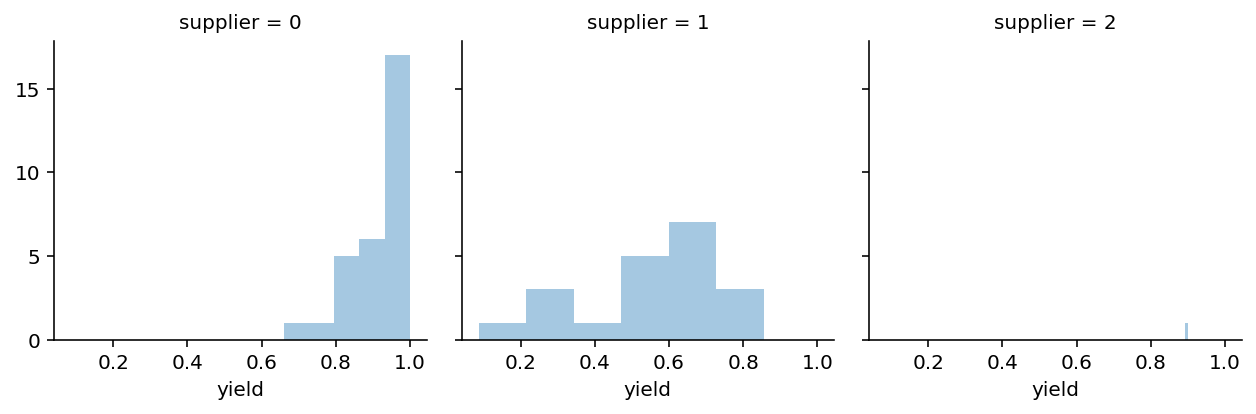

In [7]:
data_df = pd.DataFrame(data).T
data_tidy = data_df.unstack().to_frame('yield')
data_tidy.index = data_tidy.index.set_names(['supplier', 'obs'])
g = sns.FacetGrid(data=data_tidy.reset_index().dropna(), col='supplier')
g.map(sns.distplot, 'yield', kde=False);

So, we have simulated **historic data** for yeidl, and that is all Amazon has to try and estimate true profit on every robotic kit supplier.

## Dynamics of the middleman

In order to assess how many robotic kits to buy, Amazon first needs to know how many robotic kits is can sell. If Amazon buys too few, it is leaving money on the table, if it buys too many it will have to put them in storage which costs money (`HOLDING_COST`). 

Let's assume that if Amazon can sell a robotic kit for \$500, it costs Amazon \$100 in holding cost. Tha's about the holding cost ratio.

In [8]:
SALES_PRICE = 500 
HOLDING_COST = 100

Next, let's define our [**loss function**](https://en.wikipedia.org/wiki/Loss_function) which takes as inputs how many robotic kits Amazon has in stock, how many robotic kits customers want, at what price Amazon bought the kit, at what price it can sell the kit, and what the holding costs are per kit.

See [here](https://en.wikipedia.org/wiki/Profit_margin) for a quick intro to econometrics.

Vectorization (`@np.vectorize`) is a fairly well-known to data scientists and is used [routinely](https://towardsdatascience.com/data-science-with-python-turn-your-conditional-loops-to-numpy-vectors-9484ff9c622e) in coding, to speed up the overall data transformation, where simple mathematical transformations are performed over an iterable object such as a list.

In [9]:
@np.vectorize
def loss(in_stock, demand, buy_price, sales_price=SALES_PRICE, holding_cost=HOLDING_COST):
    
    # How much does Amazon earn per sell
    margin = sales_price - buy_price
    
    # Do Amazon have more in stock than demanded?
    if in_stock > demand:
        total_profit = demand * margin
        
        # everything left over after demand was met goes into holding
        total_holding_cost = (in_stock - demand) * holding_cost
        reward = total_profit - total_holding_cost
        
    else:
        # Can only sell what is in stock, no storage required
        reward = in_stock * margin
    
    # Usually we minimize, so invert
    return -reward

Let's plot our loss function. Note this just an *example loss function* for our own data experiment. Other loss functions might look completely different.

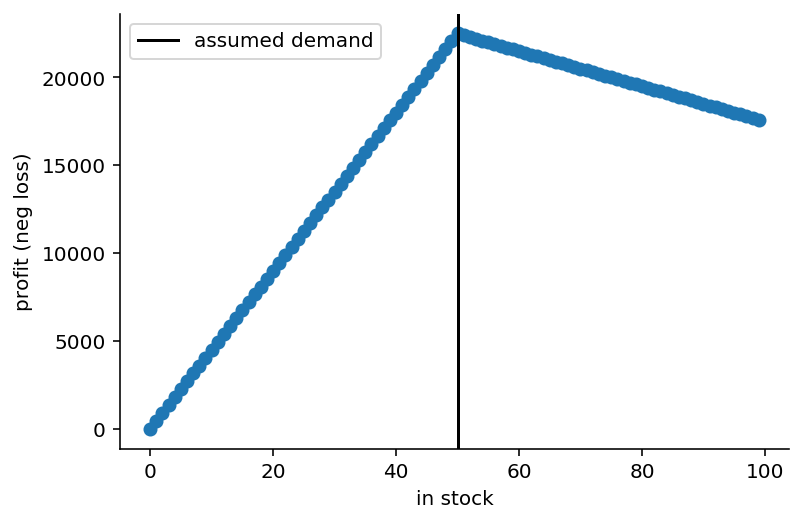

In [10]:
in_stock = np.arange(0, 100)
plt.scatter(in_stock, -loss(in_stock, 50, 50)); 
plt.axvline(50, c='k', ls='-', label='assumed demand');
plt.xlabel('in stock'); 
plt.ylabel('profit (neg loss)'); 
sns.despine(); 
plt.legend();

As you can see, if customer demand is 50 robotic kits, Amazon maximizes profit if it has 50 kits in stock. Having fewer kits eats into profits at a greater rate than ordering excess kits because in this setup margins are larger than the holding cost.

Next, we need an estimate of **demand**. As Amazon has a long history of selling robotic kits, is has a pretty good idea of what the distribution looks like, but let's assume that we don't know the true underlying parameters and only have access to ***samples***. 

Demand is a **count**, so we use a count model. i.e. a **Poisson model**. We simulate:

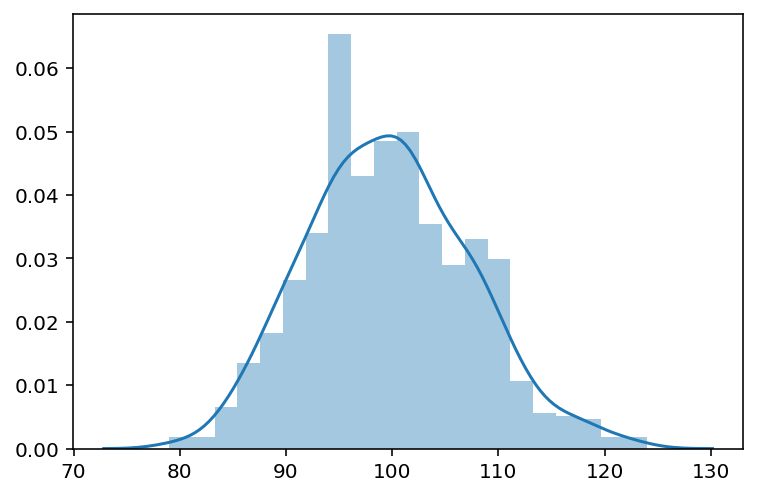

In [11]:
demand_samples = stats.poisson(60, 40).rvs(1000)
sns.distplot(demand_samples);

We can evaluate our **profit function** over every demand we observed historically. Setting kits in stock to `100`:

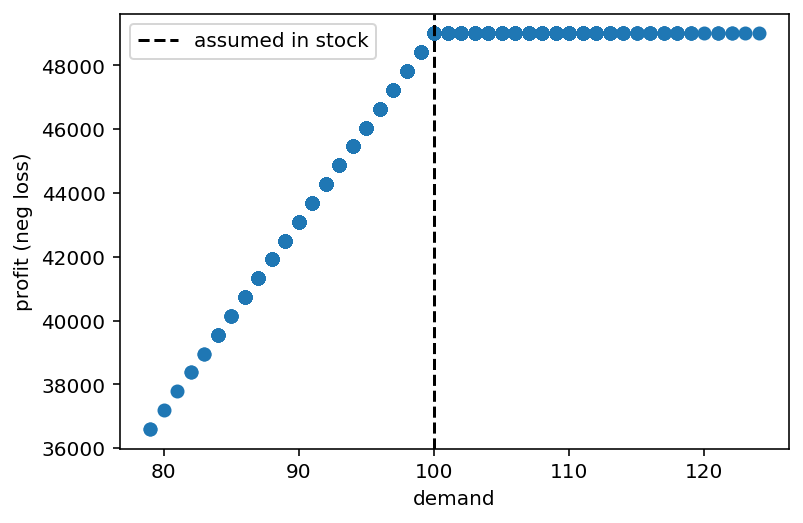

In [12]:
plt.scatter(demand_samples, -loss(in_stock=100, demand=demand_samples, buy_price=10))
plt.xlabel('demand'); plt.ylabel('profit (neg loss)'); plt.axvline(100, c='k', ls='--', label='assumed in stock');
plt.legend();

In response to demand, the loss-function behaves differently: with less demand than what we have in stock, we earn less (because we sell fewer robotic kits but also have to pay holding costs), but as demand exceeds the number of robotic kits we have in stock our profit stays flat because we can't sell more than what we have.

## Estimating yield with a Bayesian model

Let's use [`PyMC3`](http://pymc.io) to build a model to estimate the yield of every robotic kit supplier, using a Beta as likelihood, and half gaussians as its parameters.

- I know, I know, ***how did you know, professor***? Because half guassians are typical priors for the Beta. You wouldn't know this, so you would try different priors before you locate the good ones.

In [13]:
with pm.Model() as model:
    # Priors on alpha and beta parameters for each supplier
    α = pm.HalfNormal('α', sd=10., shape=3)
    β = pm.HalfNormal('β', sd=10., shape=3)
    
    # Different likelihood for every supplier because we have different
    # number of data points
    for i, d in enumerate(data):
        pm.Beta(f'supplier_yield_obs_{i}', 
            alpha=α[i], beta=β[i],
            observed=d)
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]
Sampling 4 chains: 100%|██████████| 4000/4000 [01:09<00:00, 18.35draws/s]


<div style="display:none;">
[arviz](https://pypi.org/project/arviz/0.2.0/) is a Python package for exploratory analysis of Bayesian models.

```(python)```
pip install arviz
```
(did not work for me so well)

Its `.plot_energy()` API helps to diagnose poor exploration by gradient-based algorithms like [HMC](https://arxiv.org/pdf/1701.02434.pdf) or NUTS.

Compared to using a Gaussian random walk proposal distribution in the Metropolis–Hastings algorithm, [Hamiltonian Monte Carlo](https://en.wikipedia.org/wiki/Hamiltonian_Monte_Carlo) (HMC) reduces the correlation between successive sampled states by proposing moves to distant states which maintain a high probability of acceptance. It's a better MCMC algorithm.
</div>

<div style="display:none;">
# make sure convergence looks good
az.plot_energy(trace);
</div>

## Generate possible future scenarios

In order to perform Bayesian Decision Making we need an estimate of what the future might look like. So, we just need to sample from the [posterior predictive distribution](https://en.wikipedia.org/wiki/Posterior_predictive_distribution) of our model ,which generates ***fake data*** based on **estimated posteriors**.

In [14]:
with model:
    post_pred = pm.sample_ppc(trace, 1000)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  
100%|██████████| 1000/1000 [00:02<00:00, 473.86it/s]


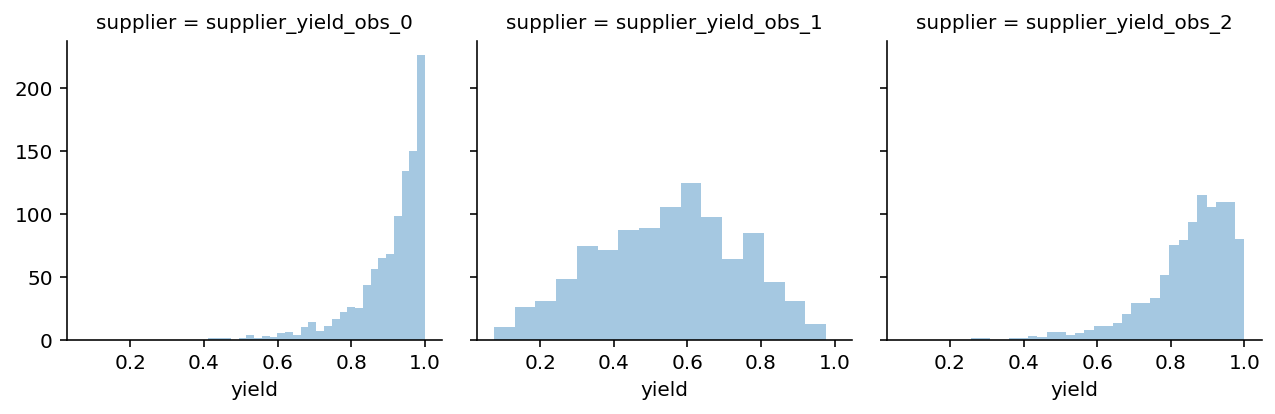

In [15]:
supplier_yield_post_pred = pd.DataFrame({k: v[:, 1] for k, v in post_pred.items()})
data_tidy = supplier_yield_post_pred.unstack().to_frame('yield')
data_tidy.index = data_tidy.index.set_names(['supplier', 'obs'])
g = sns.FacetGrid(data=data_tidy.reset_index().dropna(), col='supplier')
g.map(sns.distplot, 'yield', kde=False);

This plot shows, given the data and our model, what we can expect to observe. Note that these predictions take **uncertainty** into account. Kookye is a great performer for Amazon. For supplier 2, ***we have a lot of uncertainty*** because we only observed *very few* data points. NVIDIA is fairly new, with a lower batting average than Kookye.

Given these estimates we can write a function that converts orders Amazon receives, to how many kits are unreturned (happy customers).

In [16]:
def calc_yield_and_price(orders, supplier_yield=np.array([.9, .5, .8]), prices=PRICES):
    orders = np.asarray(orders)
    
    full_yield = np.sum(supplier_yield * orders)
    price_per_item = np.sum(orders * prices) / np.sum(orders)
    
    return full_yield, price_per_item

# Given these customer orders, 
calc_yield_and_price([100, 60, 60])

(168.0, 160.0)

So given these (randomly picked) order amounts to each supplier and some deterministic yield, customers would be happy with  168 robotic kits at an effective price of \$160 each.

## Bayesian Decision Making

Now we have to actually do the optimization. First, we need to specify our objective function which will compute total profit and effective price given a [posterior predictive](https://en.wikipedia.org/wiki/Posterior_predictive_distribution) sample. 

Once we have that and our demand (also a sample), we can compute Amazon's loss. As we have a distribution over possible scenarios, we compute the loss for each one and return the distribution.

In [17]:
def objective(orders,
              supplier_yield=supplier_yield_post_pred, 
              demand_samples=demand_samples, 
              max_order_size=MAX_ORDER_SIZE):
    
    orders = np.asarray(orders)
    losses = []
    
    # Negative orders are impossible, indicated by np.inf
    if np.any(orders < 0):
        return np.inf
    
    # Ordering more than the supplier can ship is also impossible
    if np.any(orders > MAX_ORDER_SIZE):
        return np.inf
    
    # Iterate over post pred samples provided in supplier_yield
    for i, supplier_yield_sample in supplier_yield.iterrows():
        full_yield, price_per_item = calc_yield_and_price(
            orders,
            supplier_yield=supplier_yield_sample
        )
        
        # evaluate loss over each sample with one sample from the demand distribution
        loss_i = loss(full_yield, demand_samples[i], price_per_item)
        
        losses.append(loss_i)
        
    return np.asarray(losses)

Great, we have all our required functions, let's put things into `scipy`'s optimizer and see what happens.

In [18]:
from scipy import optimize

In [19]:
# parameters for the optimization, we're just including the max order sizes as bounds
bounds = [(0, max_order) for max_order in MAX_ORDER_SIZE]
starting_value = [50., 50., 50.]

In [20]:
# minimize the expected loss under all possible scenarios
opt_stoch = optimize.minimize(lambda *args: np.mean(objective(*args)), 
                              starting_value, 
                              bounds=bounds)

The optimal order amount from every supplier is thus:

In [21]:
opt_stoch

      fun: nan
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([110.91178749,          inf,          inf])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 188
      nit: 4
   status: 2
  success: False
        x: array([  0.,  80., 100.])

Unfortunately my scipy optimization fails to converge, and the results are most probably non-optimal.

Ok, so you have a model with optimal order amounts for each robotic kit for Amazon. But how about just taking the means of the historic yield distribution for each supplier? Wouldn't that be *easier*?

## Evaluation

Let's compare the naive method of just using the means, a point estimate, to expected profit in a Bayesian simulation study.

Instead of samples from the posterior predictive, we can just pass a single sample, ***the mean***, into our objective function.

In [22]:
supplier_yield_mean = pd.DataFrame([np.mean(d) for d in data]).T
supplier_yield_mean

,0,1,2
0,0.918735,0.558903,0.896244


As well as the demand we expect on average (assume `100`). This way we can still use the above objective function but the loop will just run once. 

In [23]:
opt_non_stoch = optimize.minimize(lambda *args: objective(*args, 
                                                          supplier_yield=supplier_yield_mean, 
                                                          demand_samples=[100]), 
                                  starting_value, 
                                  bounds=bounds)

Optimal order amount from every supplier:

In [24]:
opt_non_stoch

      fun: array([-35498.00667459])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([150.58976714,  20.63534339,  70.03181963])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 220
      nit: 7
   status: 0
  success: True
        x: array([41.06417413, 45.57029406, 41.0641759 ])

The results are certainly different. The full Bayesian treatment is different. Which one is actually better in terms of our profit?

To answer that question, we will generate new data from our true generative model and compute the profit in each new scenario given the order amounts from the two optimizations.

In [25]:
np.random.seed(123)
data_new = []
for supplier_yield, supplier_yield_sd, n_obs in zip(SUPPLIER_YIELD, SUPPLIER_YIELD_SD, N_OBS):
    data_new.append(pm.Beta.dist(mu=supplier_yield, sd=supplier_yield_sd, shape=1000).random())
data_new = pd.DataFrame(data_new).T
data_new.head().add_prefix("Robotic Kit ")

,Robotic Kit 0,Robotic Kit 1,Robotic Kit 2
0,0.880298,0.752686,0.997934
1,0.698046,0.307304,0.971085
2,0.676807,0.534287,0.891209
3,0.943773,0.666368,0.975907
4,0.911538,0.457898,0.556483


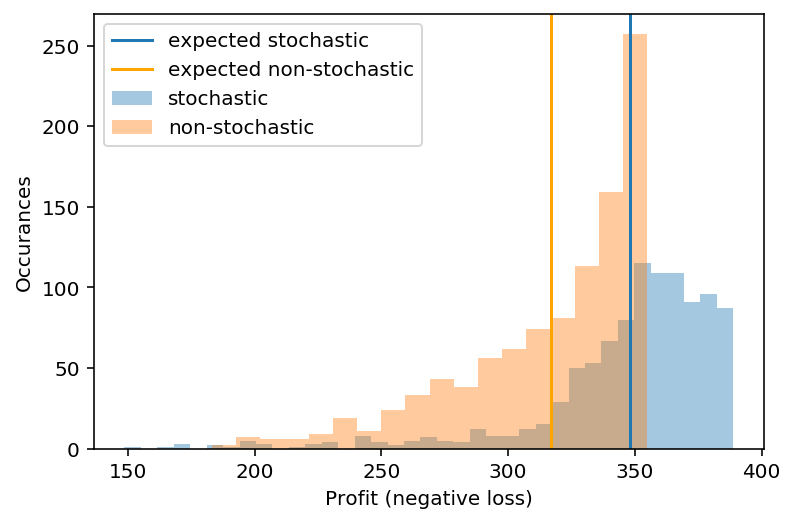

In [26]:
neg_loss_stoch = -objective(opt_stoch.x, supplier_yield=data_new) / demand_samples
neg_loss_non_stoch = -objective(opt_non_stoch.x, supplier_yield=data_new) / demand_samples
sns.distplot(neg_loss_stoch, label='stochastic', kde=False)
plt.axvline(np.mean(neg_loss_stoch), label='expected stochastic')
sns.distplot(neg_loss_non_stoch, label='non-stochastic', kde=False)
plt.axvline(np.mean(neg_loss_non_stoch), color='orange', label='expected non-stochastic')
plt.legend(); plt.xlabel('Profit (negative loss)'); plt.ylabel('Occurances');

In [27]:
print('Expected profit of Bayesian model = $%.2f' % np.mean(neg_loss_stoch))

Expected profit of Bayesian model = $347.95


In [28]:
print('Expected profit of naive model = $%.2f' % np.mean(neg_loss_non_stoch))

Expected profit of naive model = $317.01


So we demonstrated an expected increase in profit of around 10% for the Bayesian model, which is millions of $ to Amazon!

Unfortuantely our scipy optimization did not converge and our results are probably skewed wrong. That's a bummer. I'll fix that for next time!

## Conclusion

Once we have a Bayesian model and an objective function we can apply **Bayesian Decision Theory** to make better decisions. There is a [mathematical proof](http://www.ee.columbia.edu/~vittorio/BayesProof.pdf) that shows this to be optimal. But there are also more practical and intuitive reasons. The first major reason is that we do not just optimize over the most likely future scenario, but *all* possible future scenarios. 

This specialized data science use case is applicable to other situations in other industries, for example New and Used car lots.

## Reference

- James Berger, ***Statistical Decision Theory and Bayesian Analysis***